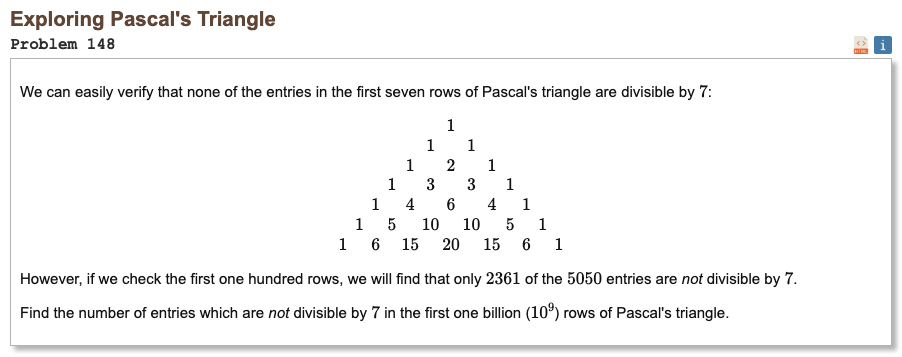

## Initial approach

* use lucas’ theorem base 7 to count entries in a single row n that are not divisible by 7
* write n in base 7 as digits d_k…d_0 and the count for that row is the product over i of (d_i + 1)
* to total the first N rows we must sum that product for all n from 0 to N − 1
* do a digit dp over the base 7 digits of N − 1 to sum products without iterating all n
* the dp walks most significant to least significant digit with a tight flag and multiplies by (digit + 1)
* this runs in O(number of base 7 digits) time which is tiny even for N = 10^9
* we can sanity check with N = 100 which yields 2361 non divisible entries out of 5050 total

In [1]:
def sum_nondiv_rows_upto(N, p=7):
    if N <= 0:
        return 0
    x = N - 1
    digits = []
    while x > 0:
        digits.append(x % p)
        x //= p
    if not digits:
        digits = [0]
    digits = digits[::-1]
    from functools import lru_cache
    @lru_cache(None)
    def dp(pos, tight):
        if pos == len(digits):
            return 1
        limit = digits[pos] if tight else p - 1
        total = 0
        for d in range(limit + 1):
            total += (d + 1) * dp(pos + 1, tight and d == limit)
        return total
    return dp(0, True)

In [2]:
%%time
result = sum_nondiv_rows_upto(10**9, 7)
print("Result:", result)

Result: 2129970655314432
CPU times: user 244 μs, sys: 51 μs, total: 295 μs
Wall time: 271 μs
